In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from pathlib import Path
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"))
spy_df= spy_df.drop(columns=['Open','High','Low','Day','Weekday','Week','Month','Year','Volume'])
spy_df

,Date,Close
0,1/2/14,154.989548
1,1/3/14,154.964035
2,1/6/14,154.515045
3,1/7/14,155.464020
4,1/8/14,155.497864
...,...,...
2300,2/22/23,398.540008
2301,2/23/23,400.660004
2302,2/24/23,396.380005
2303,2/27/23,397.730011


In [3]:
spy_df
# spy_df = spy_df.drop('Close')
# spy_df=spy_df.groupby(['Date','Volume'],as_index=False)
# spy_df =spy_df.rename(columns={'Date':'ds','Close':'y'})

,Date,Close
0,1/2/14,154.989548
1,1/3/14,154.964035
2,1/6/14,154.515045
3,1/7/14,155.464020
4,1/8/14,155.497864
...,...,...
2300,2/22/23,398.540008
2301,2/23/23,400.660004
2302,2/24/23,396.380005
2303,2/27/23,397.730011


In [4]:
print(min(spy_df['Date']))
print(max(spy_df['Date']))

1/10/14
9/9/22


In [5]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True).dropna()
spy_df= spy_df['Close']
spy_df = spy_df.reset_index()
spy_df.columns= ["ds","y"]
spy_df



,ds,y
0,2014-01-02,154.989548
1,2014-01-03,154.964035
2,2014-01-06,154.515045
3,2014-01-07,155.464020
4,2014-01-08,155.497864
...,...,...
2300,2023-02-22,398.540008
2301,2023-02-23,400.660004
2302,2023-02-24,396.380005
2303,2023-02-27,397.730011


In [6]:

train = spy_df[:2268]
test = spy_df[2268:]
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365, freq="D")
forecast = m.predict(future)


18:33:21 - cmdstanpy - INFO - Chain [1] start processing
18:33:22 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,155.058032,140.702224,177.769175,155.058032,155.058032,4.445498,4.445498,4.445498,0.192834,0.192834,0.192834,4.252664,4.252664,4.252664,0.0,0.0,0.0,159.503530
1,2014-01-03,155.115339,141.727041,177.940042,155.115339,155.115339,4.524625,4.524625,4.524625,0.133876,0.133876,0.133876,4.390748,4.390748,4.390748,0.0,0.0,0.0,159.639964
2,2014-01-06,155.287262,141.076431,177.342442,155.287262,155.287262,4.827920,4.827920,4.827920,0.187207,0.187207,0.187207,4.640714,4.640714,4.640714,0.0,0.0,0.0,160.115182
3,2014-01-07,155.344569,143.929656,178.322411,155.344569,155.344569,4.881990,4.881990,4.881990,0.223018,0.223018,0.223018,4.658973,4.658973,4.658973,0.0,0.0,0.0,160.226560
4,2014-01-08,155.401877,142.230350,178.358866,155.401877,155.401877,4.831693,4.831693,4.831693,0.190210,0.190210,0.190210,4.641483,4.641483,4.641483,0.0,0.0,0.0,160.233570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2023-12-31,387.857097,346.175387,434.341093,346.722223,425.698891,3.364663,3.364663,3.364663,-0.463573,-0.463573,-0.463573,3.828236,3.828236,3.828236,0.0,0.0,0.0,391.221761
2629,2024-01-01,387.823751,349.379565,436.782182,346.579487,425.823460,4.195687,4.195687,4.195687,0.187207,0.187207,0.187207,4.008480,4.008480,4.008480,0.0,0.0,0.0,392.019438
2630,2024-01-02,387.790405,347.907498,433.379287,346.466691,425.926150,4.398632,4.398632,4.398632,0.223018,0.223018,0.223018,4.175614,4.175614,4.175614,0.0,0.0,0.0,392.189037
2631,2024-01-03,387.757059,352.057636,437.341349,346.354676,426.043638,4.514775,4.514775,4.514775,0.190210,0.190210,0.190210,4.324565,4.324565,4.324565,0.0,0.0,0.0,392.271834


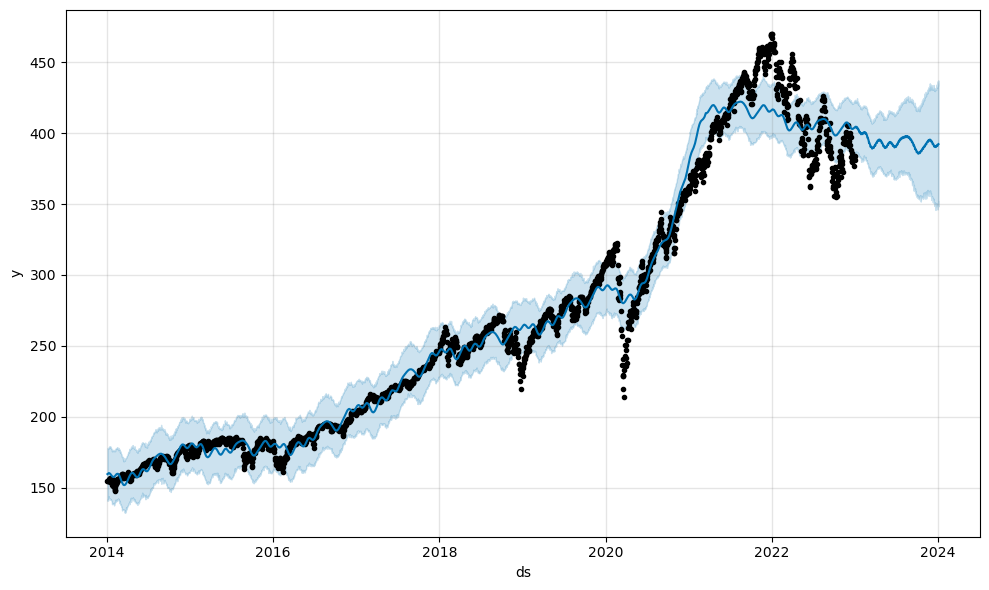

In [8]:
forecast_fig = m.plot(forecast)

In [9]:
# Make a prediction using the testing data
testing_predections = m.predict(test)

In [10]:
balanced_accuracy_score(test,testing_predections)

TypeError: '<' not supported between instances of 'float' and 'Timestamp'

In [ ]:
# # Print the balanced_accuracy score of the model
# forecast_sub = forecast[['ds','yhat']]
# test = test[['ds','y']]
# eval_df = test.merge(forecast_sub, on=['ds'],how='left')
# eval_df['abs_error'] = abs(eval_df['y']-eval_df['yhat'])
# eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
# total_y = sum(eval_df['y'])
# total_error = sum(eval_df['abs_error'])
# forecast_acc= 1-(total_error/total_y)
# print(forecast_acc)

0.9781191123301755


In [ ]:
#Performance Metrics 
# Initial training period.
initial= 
initial= 
#Period length that we perform the cross validation for.
period= 
period=
#Horizon of prediction essentially for each fold.
horizon = 
horizon=
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)